In [61]:
# escludi da 16 a 27
import pandas as pd
import matplotlib.pyplot as plt
#!pip install squarify
import squarify
import numpy as np
import matplotlib

font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)

surv = pd.read_csv("survey_ita.tsv",sep="\t").iloc[3:,3:].reset_index(drop=True)
surv2 = pd.read_csv("survey_ita_2.tsv",sep="\t").iloc[:,2:]
surv = pd.concat([surv, surv2],ignore_index=True)
surv.head(3)

,Età,Genere,Regione di appartenenza della struttura sanitaria in cui opera,Tipologia della struttura sanitaria,Ruolo professionale (è possibile indicare più di 1 risposta),Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza?,"Se ha risposto sì, qual è stata la motivazione principale del calo?","Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa:",Con quali modalità ha erogato le sue prestazioni DURANTE l'emergenza?,La Regione di appartenenza della struttura in cui opera dispone del registro clinico elettronico?,...,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Valutazione/Monitoraggio di pazienti di nuovo esordio].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Gestione dell'emergenza].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Monitoraggio della terapia farmacologica].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Prescrizione di farmaci].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Psicoterapia live].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Psicoterapia tramite trasferimento di materiale audio-visivo].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Riabilitazione psichiatrica].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Consulenza giuridica in ambito civile].1,Indichi per quali delle seguenti prestazioni utilizzava gli strumenti telematici indicati PRIMA dell'emergenza [Consulenza giuridica in ambito penale].1,L'impiego di strumenti telematici per la salute mentale permette di abbattere la barriera dello stigma
0,31 - 40,Maschile,Veneto,Azienda Sanitaria Locale,Psichiatra,No,NaN,NaN,"Mista, prevalentemente in presenza",Sì,...,NaN,"Telefono (chiamate, SMS), e-mail","Telefono (chiamate, SMS)",NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,31 - 40,Maschile,Campania,Azienda Ospedaliera,Neuropsichiatra infantile,Sì,Lockdown,6,"Mista, prevalentemente in presenza",No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,31 - 40,Maschile,Toscana,Azienda Ospedaliera,Psichiatra,Sì,Interruzione di servizi non urgenti,7,"Mista, prevalentemente tramite strumenti telem...",Sì,...,"Telefono (chiamate, SMS)","Telefono (chiamate, SMS)","Telefono (chiamate, SMS)","Telefono (chiamate, SMS), Piattaforma certific...",NaN,NaN,NaN,NaN,NaN,2.0


Text(0.5, 1.0, 'AGE')

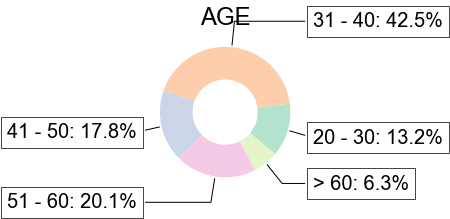

In [62]:
ages = surv["Età"].value_counts().sort_index()
ages = 100*(ages/ages.sum())
ages = ages[ages>1]

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in ages.items()]

data = ages.values

colors =['#b3e2cd', '#fdcdac', '#cbd5e8', '#f4cae4', '#e6f5c9']
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("AGE")


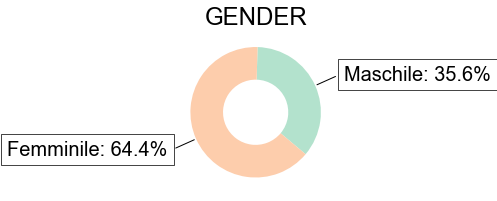

In [63]:
gender = surv["Genere"].value_counts().sort_index(ascending=False)
gender = 100*(gender/gender.sum())

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

annot = [n+": "+str(np.round(v,1))+"%" for n,v in gender.items()]

data = gender.values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("GENDER")

plt.show()


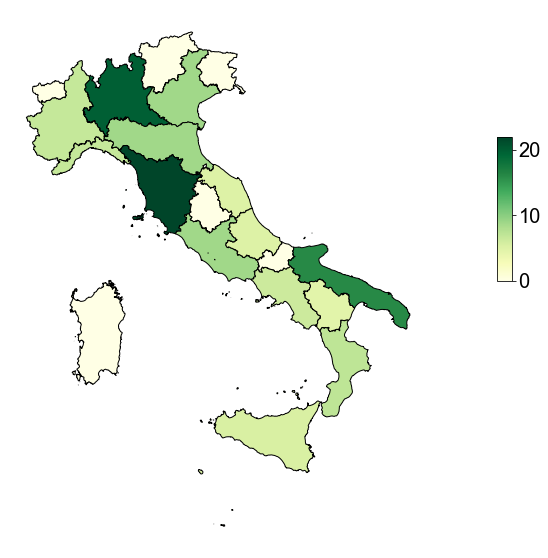

In [64]:
import geopandas as gpd
import os
import geopandas as gpd
import pandas as pd
italy = gpd.read_file(os.getcwd() + '\\italy\\reg2011_g.shp')

temp =  surv["Regione di appartenenza della struttura sanitaria in cui opera"].value_counts().reset_index().rename(columns={"index":"regione","Regione di appartenenza della struttura sanitaria in cui opera":"num"})
temp["regione"] = temp["regione"].apply(lambda x: x.upper())
for_plotting = italy.merge(temp, left_on = 'NOME_REG', right_on = 'regione',how="outer")
for_plotting["num"].fillna(-10, inplace=True,)
for_plotting.head(20)

fig, ax =plt.subplots(figsize=(10,10))
for_plotting.plot(column='num', 
                  cmap = 'YlGn', ax=ax  ,legend = False,
                    scheme=None, k=3,
                    edgecolor="black",facecolor="white")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

cax = fig.add_axes([.9, 0.5, 0.02, 0.2])
sm = plt.cm.ScalarMappable(cmap='YlGn', norm=plt.Normalize(vmin=0, vmax=22))
sm._A = []
cbr = fig.colorbar(sm, cax=cax)
cbr.ax.tick_params(labelsize=20) 

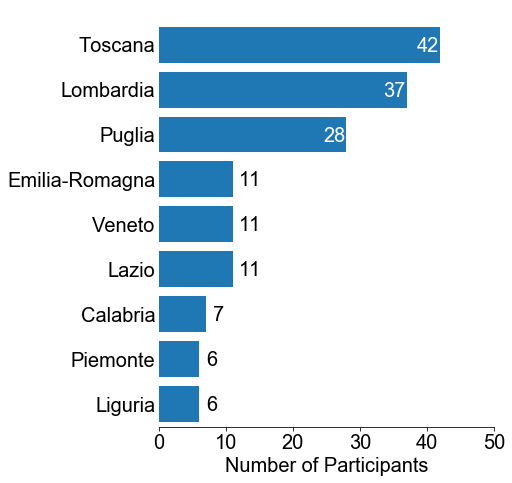

In [65]:
nations = surv["Regione di appartenenza della struttura sanitaria in cui opera"].value_counts()[0:9].sort_values(ascending=True)
fig, ax1 = plt.subplots(figsize=(6,8))

ax1.barh([n.title() for n in nations.index],nations.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', -15))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("Number of Participants")

for i,(ind,n) in enumerate(nations.iteritems()):
    if n>=20:
        plt.text(x = n-3.5 , y = i-.15 , s = n , size = 20, color="white")
    else:
        plt.text(x = n+1 , y = i-.15 , s = n , size = 20, color="black")

C:\Users\oldboy\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 


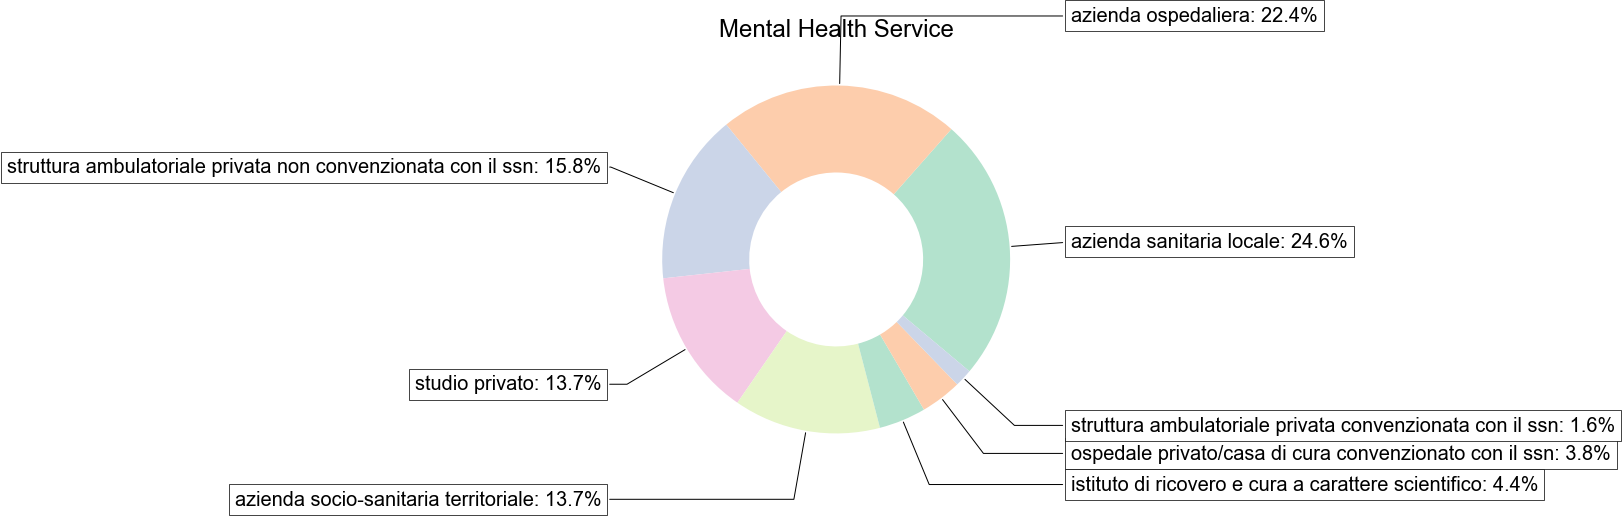

In [67]:
from collections import Counter

tms = [x.lower().strip() for s in surv['Tipologia della struttura sanitaria'].dropna() for x in s.split(", ")]
for i,c in enumerate(tms):
    if c in ['libero professionista','libera professione','studio professionale','studio libera professione','studio privato non convenzionato con ssn','privato']:
        tms[i] = 'studio privato'
    elif c in ['rsp','centro diurno','centro diurno psichiatrico']:
        tms[i] = 'ospedale privato/casa di cura convenzionato con il ssn'
    elif c in ['policlinico universitario','ser.d']:
        tms[i] = 'istituto di ricovero e cura a carattere scientifico'
    elif c in ['comunità terapeutica psichiatrica (cooperativa sociale)']:
        tms[i] = 'struttura ambulatoriale privata non convenzionata con il ssn'
    elif c in ["residenza per l'esecuzione di misure di sicurezza"]:
        tms[i] = 'azienda socio-sanitaria territoriale'
        

tms = Counter(tms).most_common()
tms =pd.DataFrame(tms).rename(columns = {0:"name",1:"value"})
tms["value"] = 100*(tms["value"]/tms["value"].sum())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

annot = [c[1]["name"]+": "+str(np.round(c[1]["value"],1))+"%" for c in tms.iterrows()]

data = tms["value"].values

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40,colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(annot[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Mental Health Service")
plt.tight_layout()
plt.show()

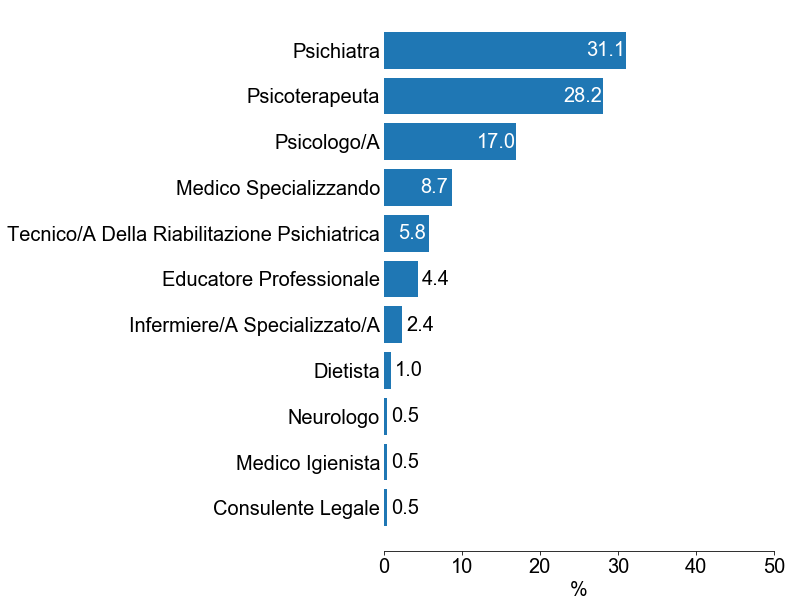

In [69]:
ruolo = surv["Ruolo professionale (è possibile indicare più di 1 risposta)"].dropna()
ruolo = [r.strip().lower() for rs in ruolo for r in rs.split(",")]

for i,r in enumerate(ruolo):
    if r in ['educatore','educatrice di centro sociale']:
        ruolo[i] = 'educatore professionale'
    if r in ['infermiere specializzato','assistente sanitaria']:
        ruolo[i] = 'infermiere/a specializzato/a'
    if r in ['tnpee']:
        ruolo[i] = 'tecnico/a della riabilitazione psichiatrica'
    if r in ['neuropsichiatra infantile']:
        ruolo[i] = 'psichiatra'
        

ruolo = Counter(ruolo).most_common()

ruolo =pd.DataFrame(ruolo).rename(columns = {0:"name",1:"value"}).sort_values(by="value").reset_index(drop=True)
ruolo["value"] = 100*(ruolo["value"]/ruolo["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in ruolo["name"]],ruolo["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,50))
ax1.set_xlabel("%")

for i,n in ruolo.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-5.1 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>5:
        plt.text(x = n["value"]-4 , y = i-.13 , s = round(n["value"],1) , size = 20, color="white")
    elif n["value"]>0:
        plt.text(x = n["value"]+.5 , y = i-.13 , s = round(n["value"],1) , size = 20, color="black")
plt.show()

In [70]:
print(surv.columns[5])
surv[surv.columns[5]].value_counts()

Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza? 


Sì    134
No     40
Name: Le sue prestazioni sanitarie hanno subito un calo durante l'emergenza? , dtype: int64

Se ha risposto sì, qual è stata la motivazione principale del calo? 


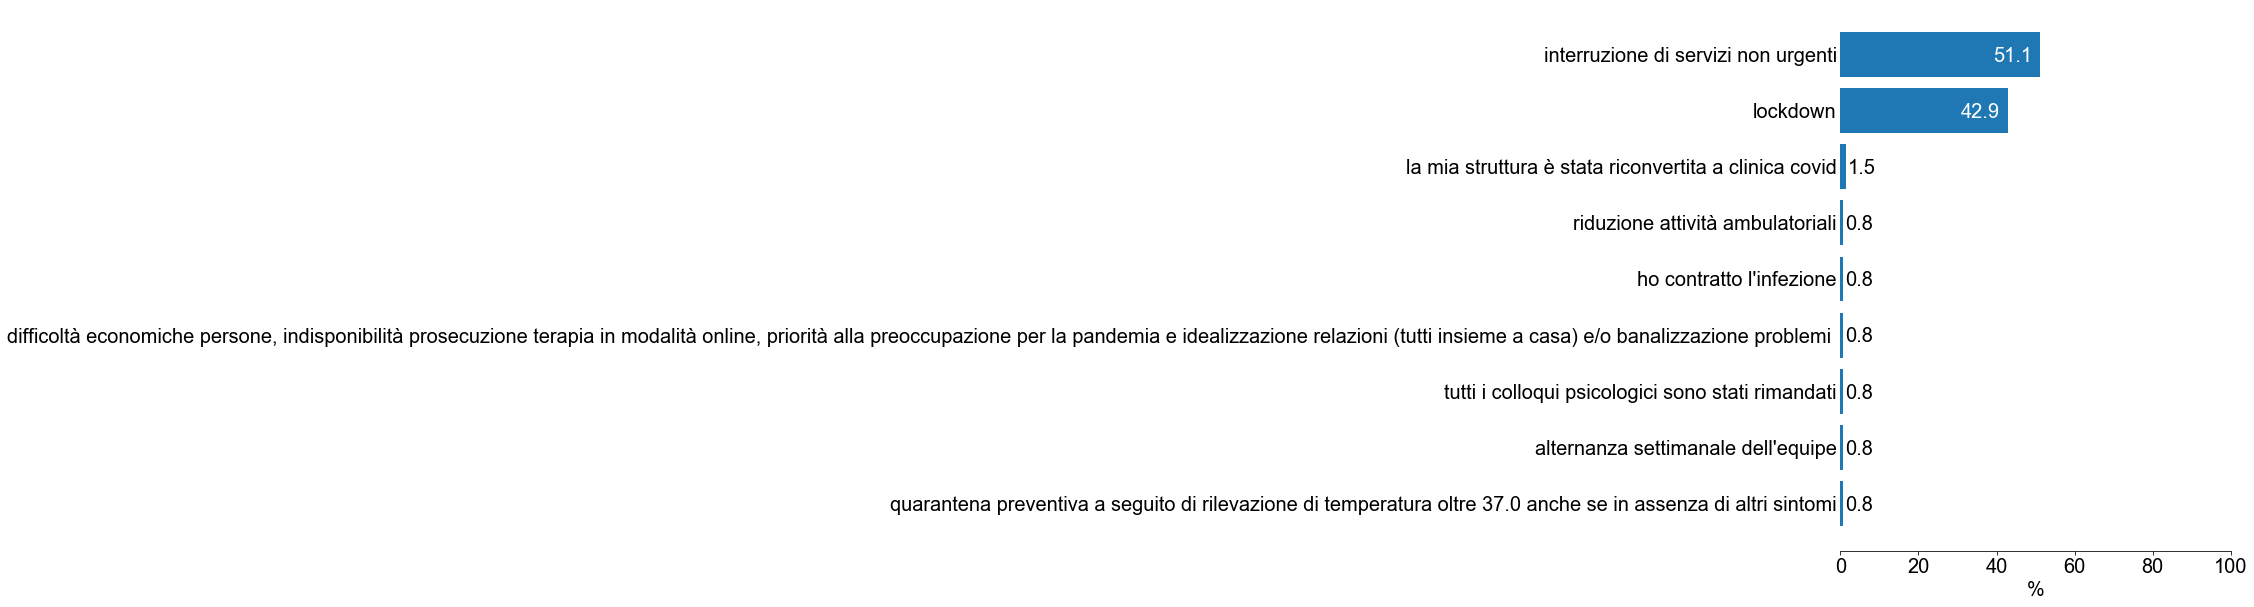

In [71]:
print(surv.columns[6])
worked = surv[surv.columns[6]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Se ha risposto sì, quantifichi l'impatto dell'emergenza sulla sua attività lavorativa:
0    7
dtype: object


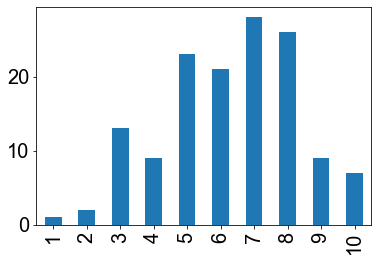

In [72]:
print(surv.columns[7])
temp = pd.Series([int(i) for i in surv[surv.columns[7]].dropna()] ).value_counts()
print(surv[surv.columns[7]].dropna().mode())
#temp.index =  [int(i) for i in temp.index]

temp.sort_index().plot(kind="bar")

Con quali modalità ha erogato le sue prestazioni DURANTE l'emergenza?


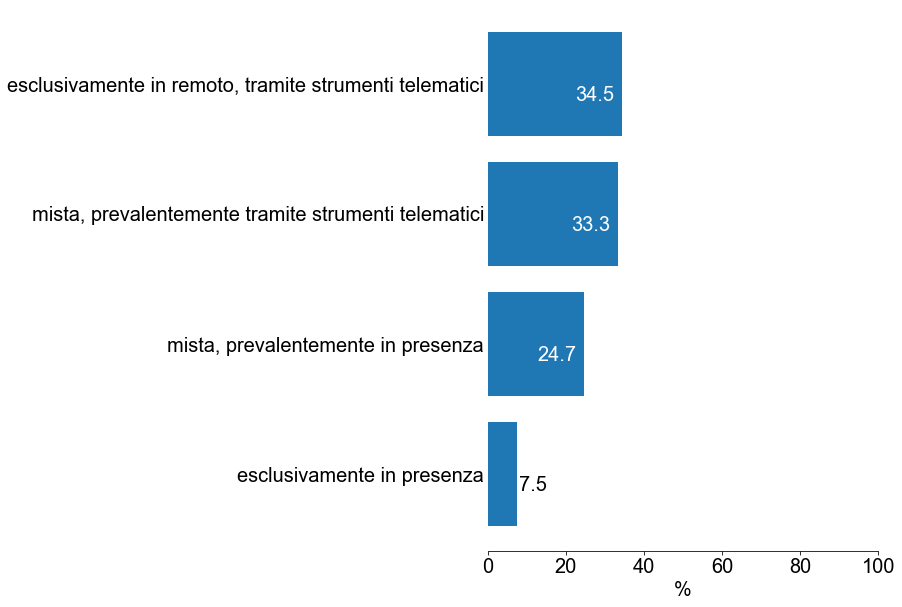

In [73]:
print(surv.columns[8])
worked = surv[surv.columns[8]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

La Regione di appartenenza della struttura in cui opera dispone del registro clinico elettronico?


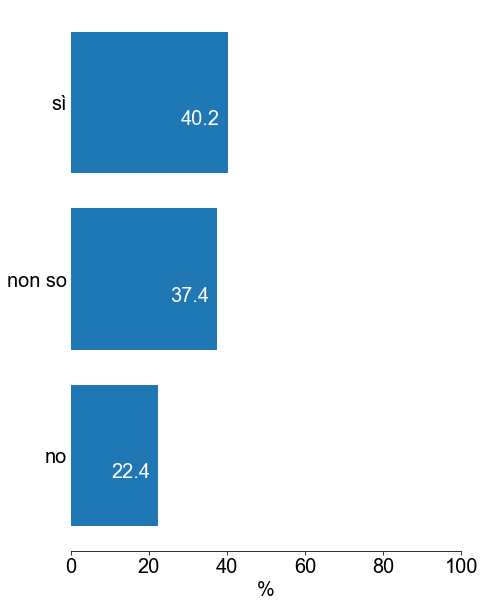

In [74]:
print(surv.columns[9])
worked = surv[surv.columns[9]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Quali tra i seguenti strumenti telematici ha utilizzato DURANTE l'emergenza per raggiungere e fornire supporto ai pazienti?


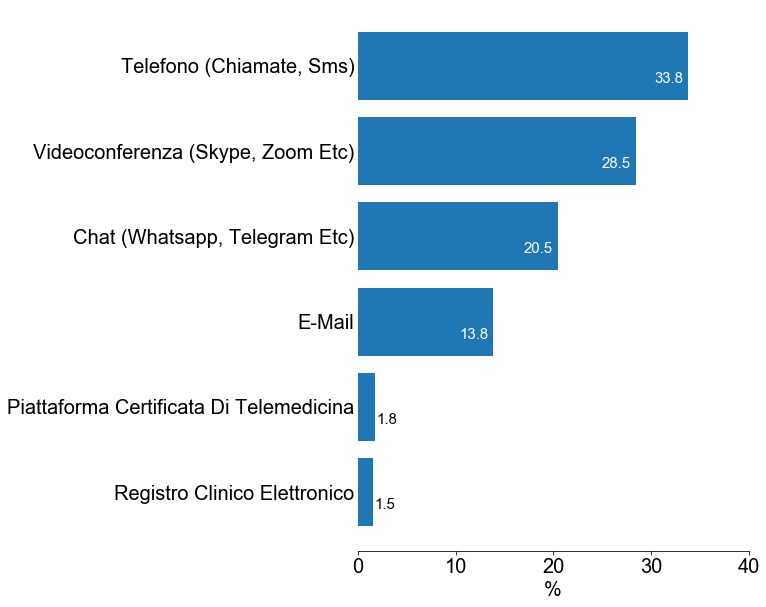

In [75]:
print(surv.columns[10])

import re 

services = surv[surv.columns[10]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


Quale percentuale delle sue prestazioni ha erogato tramite strumenti telematici DURANTE l'emergenza?


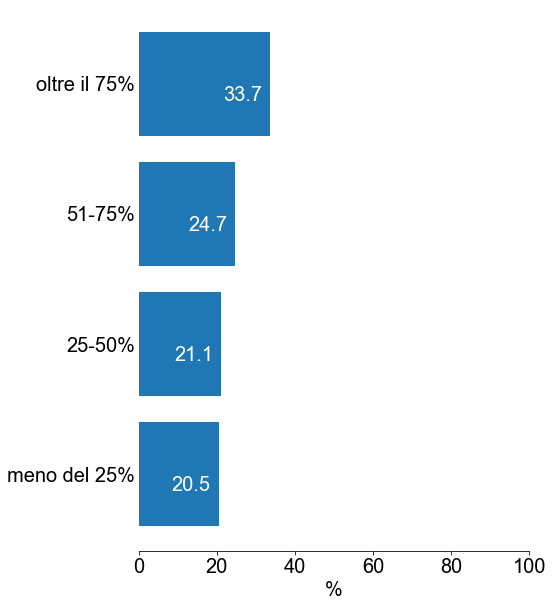

In [76]:
print(surv.columns[12])

worked = surv[surv.columns[12]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Quanto ritiene che gli strumenti telematici le siano stati utili DURANTE l'emergenza per raggiungere e fornire supporto soddisfacente ai pazienti?
0    5.0
dtype: float64


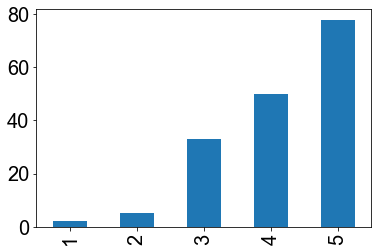

In [77]:
print(surv.columns[13])

temp = pd.Series([int(i) for i in surv[surv.columns[13]].dropna()] ).value_counts()
print(surv[surv.columns[13]].dropna().mode())
#temp.index =  [int(i) for i in temp.index]

temp.sort_index().plot(kind="bar")

Gli strumenti telematici, che ha utilizzato durante l'emergenza, erano disponibili nella sua struttura?


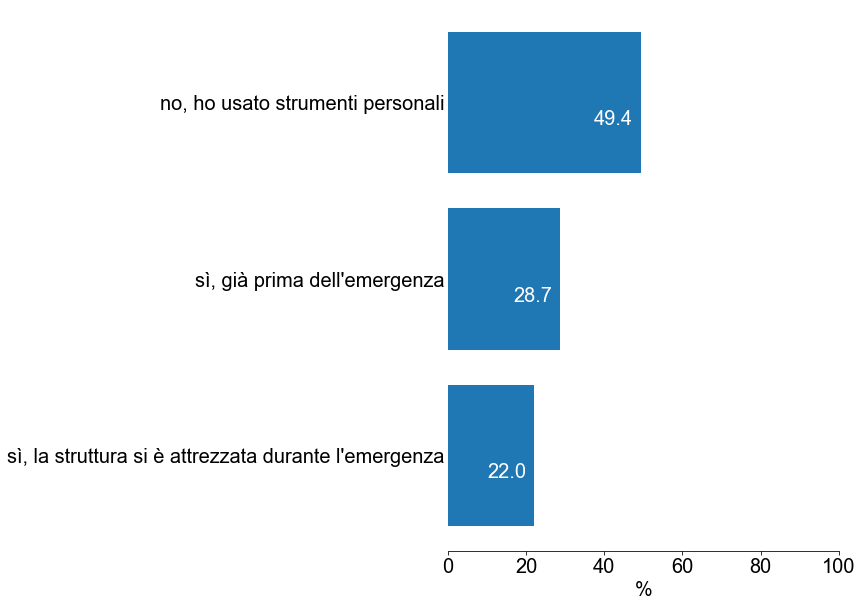

In [78]:
print(surv.columns[14])

worked = surv[surv.columns[14]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

Quali tra i seguenti strumenti telematici utilizzava PRIMA dell'emergenza per raggiungere e fornire supporto ai pazienti?


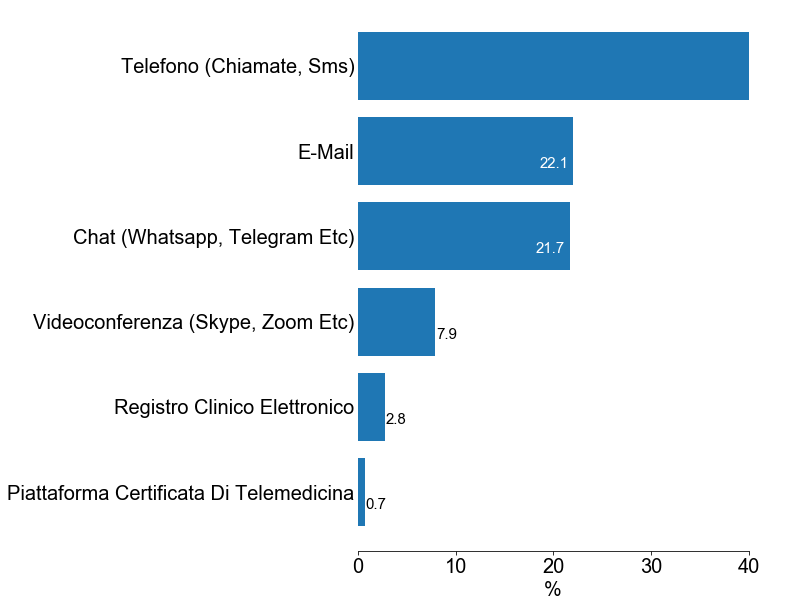

In [79]:
print(surv.columns[15])
worked = surv[surv.columns[15]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

services = surv[surv.columns[15]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,40))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()


Quale percentuale delle sue prestazioni erogava tramite strumenti telematici PRIMA dell'emergenza ?


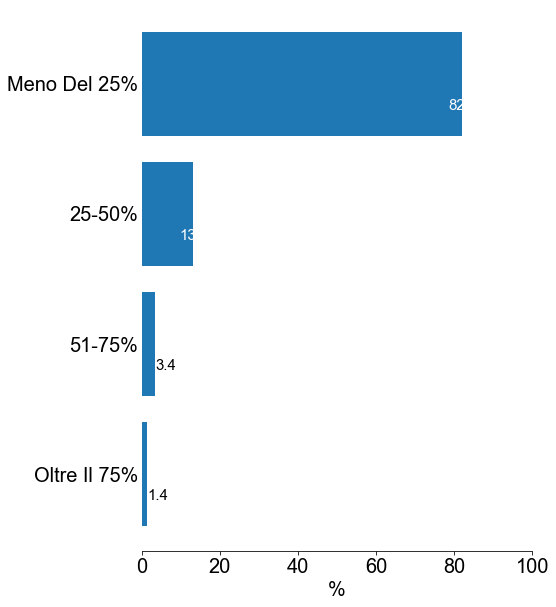

In [82]:
inc=28
print(surv.columns[inc])
worked = surv[surv.columns[inc]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i-.20 , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i-.2 , s = round(n["value"],1) , size = 15, color="black")
plt.show()

PRIMA dell'emergenza, quanto riteneva utili gli strumenti telematici per raggiungere e fornire supporto soddisfacente ai pazienti ?
0    3.0
dtype: float64


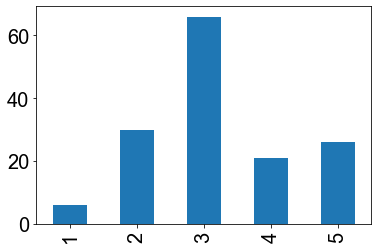

In [86]:

print(surv.columns[inc])
temp = pd.Series([int(i) for i in surv[surv.columns[inc]].dropna()] ).value_counts()
print(surv[surv.columns[inc]].dropna().mode())
#temp.index =  [int(i) for i in temp.index]

temp.sort_index().plot(kind="bar")

Continuerà ad utilizzare strumenti telematici nella sua pratica clinica DOPO l'emergenza?
Continuerà ad utilizzare strumenti telematici nella sua pratica clinica DOPO l'emergenza?


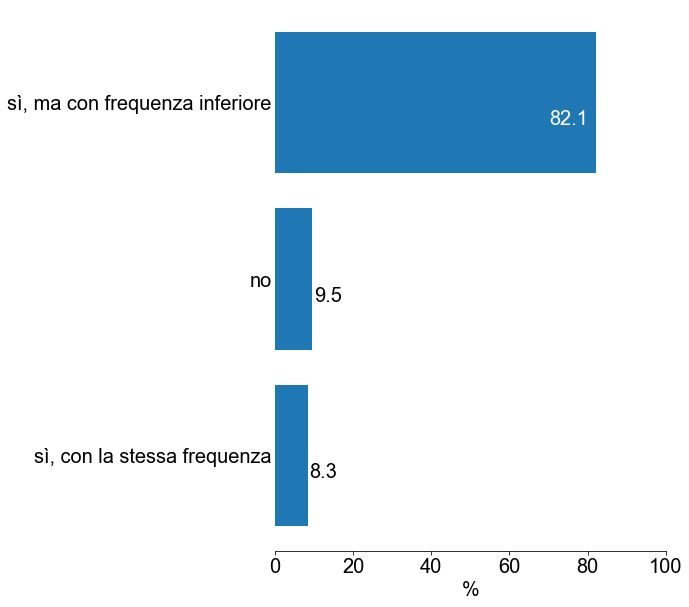

In [89]:
inc=30
print(surv.columns[inc])
surv[surv.columns[inc]]

worked = surv[surv.columns[inc]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()


Per quali fasce di età ritiene che l'impiego di strumenti telematici sia più utile e vantaggioso?


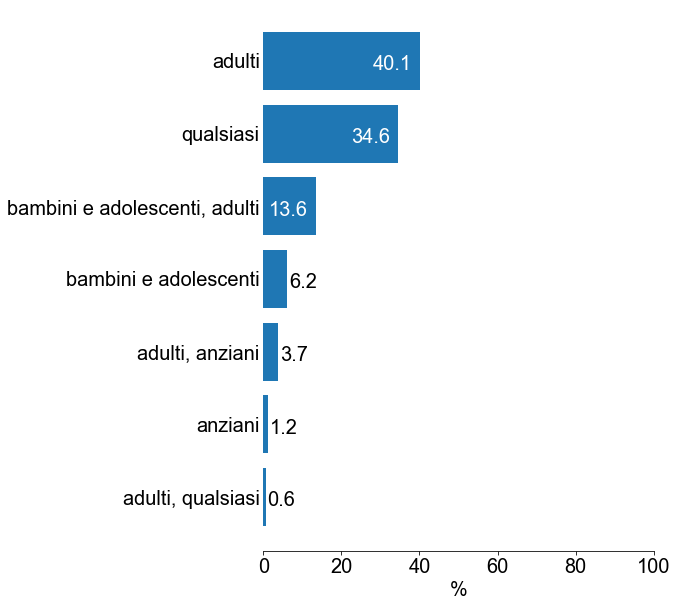

In [92]:
inc=31
print(surv.columns[inc])
surv[surv.columns[inc]]

worked = surv[surv.columns[inc]].apply(lambda x: x.lower() if type(x)!=float else np.nan).dropna().value_counts().sort_values(ascending=True)

worked = 100*(worked/worked.sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh(worked.index,worked.values)

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,(l,n) in enumerate(worked.items()):
    if n>10:
        plt.text(x = n-12 , y = i-.13 , s = round(n,1) , size = 20, color="white")
    else:
        plt.text(x = n+.5 , y = i-.13 , s = round(n,1) , size = 20, color="black")
plt.show()

In quali popolazioni ritiene che l'uso di strumenti telematici sia più utile e vantaggioso?


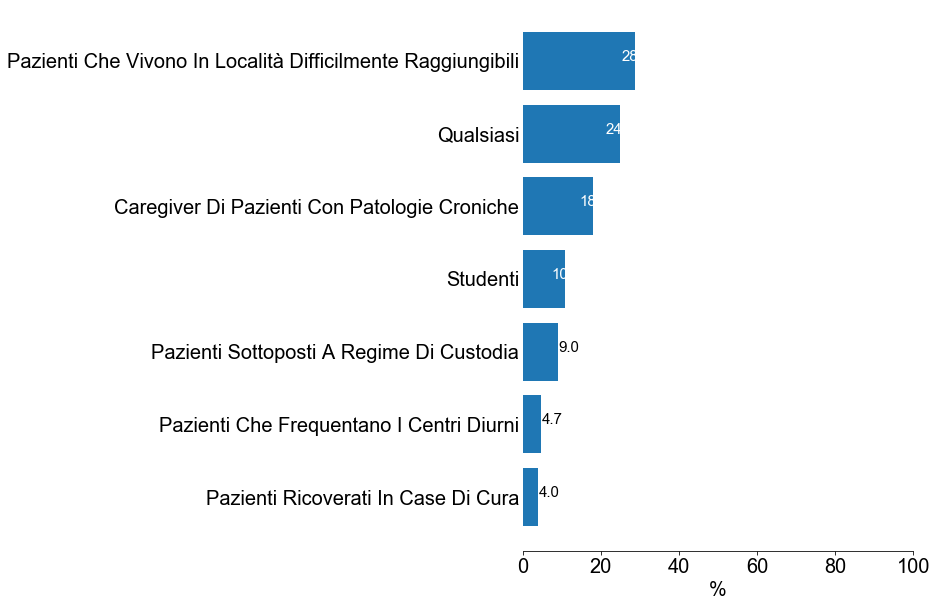

In [102]:
inc=32
print(surv.columns[inc])
surv[surv.columns[inc]]

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
    if n["value"]>10:
        plt.text(x = n["value"]-3.5 , y = i , s = round(n["value"],1) , size = 15, color="white")
    else:
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

Per quali disturbi ritiene che l'uso di strumenti telematici sia più utile e vantaggioso?


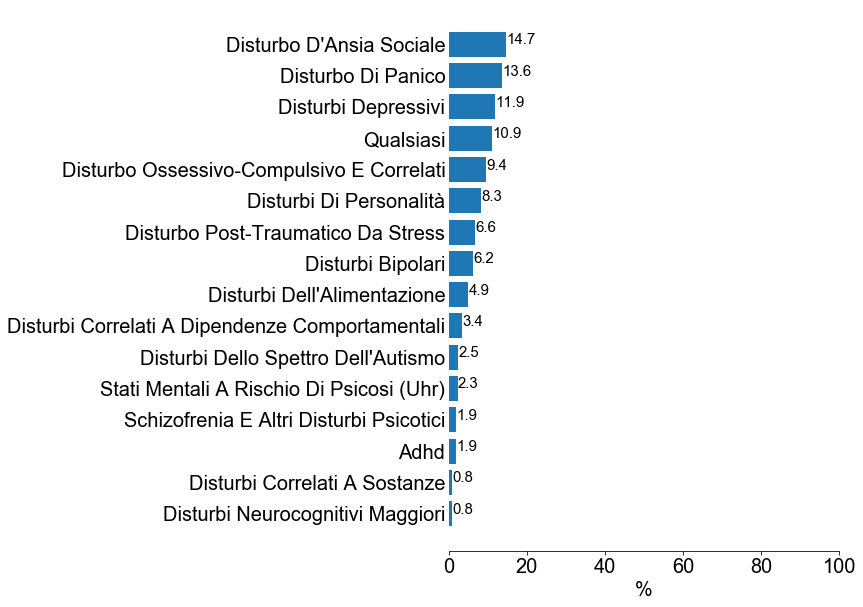

In [104]:
inc=33
print(surv.columns[inc])
surv[surv.columns[inc]]

services = surv[surv.columns[inc]].dropna()
r = re.compile(r'(?:[^,(]|\([^)]*\))+')
services = [s.strip() for serv in services for s in r.findall(serv)]
services = pd.DataFrame(Counter(services).most_common(),columns=("name","value")).sort_values(by="value").reset_index(drop=True)

services = services[services["value"]>1].reset_index(drop=True)
services["value"] = 100*(services["value"]/services["value"].sum())

fig,ax1 = plt.subplots(figsize=(7,10))
ax1.barh([n.title() for n in services["name"]],services["value"])

ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_position(('outward', 0))

ax1.tick_params(axis=u'y', which=u'both',length=0)
ax1.set_xlim((0,100))
ax1.set_xlabel("%")

for i,n in services.iterrows():
        plt.text(x = n["value"]+.1 , y = i , s = round(n["value"],1) , size = 15, color="black")
        
plt.show()

C:\Users\oldboy\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1350: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout(pad=layout_pad)


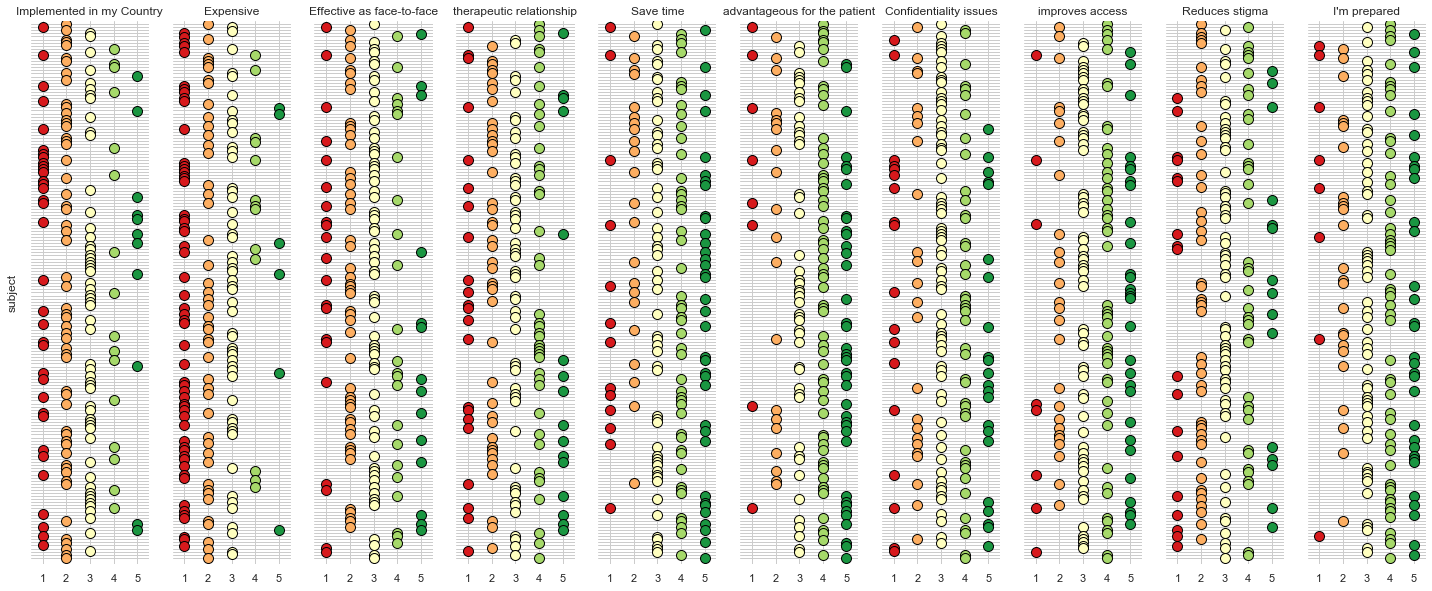

In [111]:

likert = surv.iloc[:,34:44].dropna(axis=0,how="all").fillna(3) # 1 subject is all nan and 1 subject skipped one item [in this subject the answer is replaced with neutral 3]

likert = likert.reset_index().rename(columns= {"index":"subject"})

import seaborn as sns
sns.set(style="whitegrid")

# Load the dataset
crashes = sns.load_dataset("car_crashes")

# Make the PairGrid
g = sns.PairGrid(likert,
                 x_vars=likert.columns[1:], y_vars=["subject"],
                 height=10, aspect=.25,)


def mystrip(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    sns.stripplot(x, y, edgecolor="black", palette=[col[i] for i in x], size=10, orient="h",
    linewidth=1)
    
# Draw a dot plot using the stripplot function
g.map(mystrip)#color="purple")

g.set(xlim=(0.5, 5.5), ylim=(len(likert)+1.1,-1.1,), xlabel="", xticks=[1,2,3,4,5],yticklabels=[])

# Use semantically meaningful titles for the columns
titles = ["Implemented in my Country","Expensive","Effective as face-to-face","therapeutic relationship","Save time",
"advantageous for the patient","Confidentiality issues","improves access","Reduces stigma","I'm prepared","I am satisfied"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(True)
    ax.yaxis.grid(True)


sns.despine(left=True, bottom=True)

plt.show()


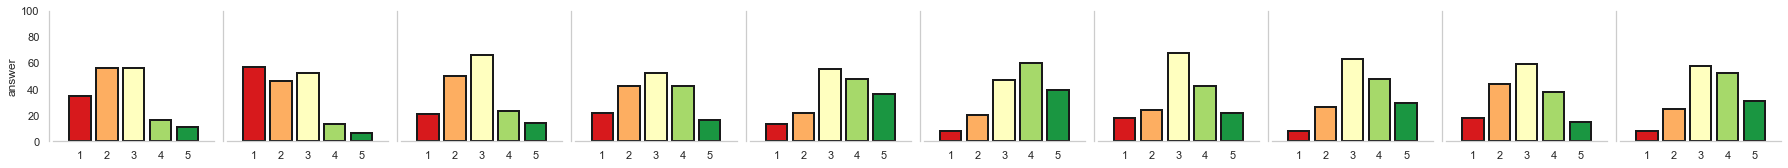

In [113]:
likert = surv.iloc[:,34:44].dropna(axis=0,how="all").fillna(3)
likert_f = likert.agg(pd.value_counts).fillna(0).reset_index().rename(columns={"index":"answer"})

g = sns.PairGrid(likert_f,
                 x_vars=likert_f.columns[1:], y_vars=["answer"],aspect=1,)

def mybar(x,y, **kwargs):
    col = {1:'#d7191c',2:'#fdae61',3:'#ffffbf',4:'#a6d96a',5:'#1a9641'}
    plt.bar(y,x,color=['#d7191c','#fdae61','#ffffbf','#a6d96a','#1a9641'],edgecolor="k",linewidth=2)

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    #ax.set(title=title)
    #ax.spines['left'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_position(('outward', 4))
    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(False)

g.map(mybar)
g.set(xlim=(0, 6), ylim=(0,100),xlabel="",xticks=[1,2,3,4,5])

plt.tight_layout()


In [119]:
inc=47
print(surv.columns[inc])
surv[surv.columns[inc]]


Con quali modalità erogava le sue prestazioni PRIMA dell'emergenza?


0      Mista, prevalentemente in presenza
1      Mista, prevalentemente in presenza
2      Mista, prevalentemente in presenza
3      Mista, prevalentemente in presenza
4      Mista, prevalentemente in presenza
                      ...                
170                                   NaN
171            Esclusivamente in presenza
172            Esclusivamente in presenza
173            Esclusivamente in presenza
174            Esclusivamente in presenza
Name: Con quali modalità erogava le sue prestazioni PRIMA dell'emergenza?, Length: 175, dtype: object

In [112]:
for i,c in enumerate(surv.columns[34:44]):
    print(i,c)

0 L'impiego di strumenti telematici per la salute mentale è a un buon livello di implementazione in Italia
1 L'impiego di strumenti telematici per la salute mentale ha costi elevati
2 L'impiego di strumenti telematici per la salute mentale è un approccio valido, accurato ed efficace tanto quanto la pratica clinica in presenza
3 L'impiego di strumenti telematici per la salute mentale consente di stabilire una buona relazione medico-paziente
4 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini di tempo per l'operatore
5 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini di tempo per il paziente
6 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini economici per l'operatore
7 L'impiego di strumenti telematici per la salute mentale è vantaggioso in termini economici per il paziente
8 L'impiego di strumenti telematici per la salute mentale presenta problemi di confidenzialità tali da limitarne l'utilizz